In [6]:
import random
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import matplotlib.pyplot as plt
import pandas as pd
import cv2
import glob
from tqdm import tqdm
from skimage import io, transform
from keras.utils import to_categorical
import time
from sklearn.model_selection import train_test_split
import os
import seaborn as sns
import plotly.express as px
from sklearn import preprocessing
import joblib
label_encoder = preprocessing.LabelEncoder()

In [8]:
def count_cls(imgdir):
    cnt = []
    for i,folder_name in enumerate(os.listdir(imgdir)):
        l=len(os.listdir(f'{imgdir}/{folder_name}'))
        cnt.append(l)

    return cnt

imgdir="pokemon_dataset/pokemon/train"
cnt=count_cls(imgdir)

fig = px.bar(cnt)
fig.show()

In [25]:
def prepare_data(imgdir):
    x = []
    labels = []
    for i,folder_name in enumerate(os.listdir(imgdir)):
        for filename in tqdm(os.listdir(f'{imgdir}/{folder_name}')):
            if filename.endswith('png'):   
                im = cv2.imread(f'{imgdir}/{folder_name}/{filename}')
                if im is not None:
                    im = cv2.resize(im, (100, 100))
                    x.append(im)
                    labels.append(folder_name)
    return x , labels

## Prepare Train Set

In [26]:
imgdir="pokemon_dataset/pokemon/train"
x_train,y_train=prepare_data(imgdir)
y_train= label_encoder.fit_transform(y_train)

  0%|                                                     | 0/5 [00:00<?, ?it/s]libpng warning: iCCP: known incorrect sRGB profile
libpng warning: iCCP: known incorrect sRGB profile
  0%|                                                     | 0/7 [00:00<?, ?it/s]libpng warning: iCCP: known incorrect sRGB profile
libpng warning: iCCP: known incorrect sRGB profile
  0%|                                                    | 0/13 [00:00<?, ?it/s]libpng warning: iCCP: known incorrect sRGB profile
libpng warning: iCCP: known incorrect sRGB profile
libpng warning: iCCP: known incorrect sRGB profile
libpng warning: iCCP: known incorrect sRGB profile
  0%|                                                     | 0/7 [00:00<?, ?it/s]libpng warning: iCCP: known incorrect sRGB profile
libpng warning: iCCP: known incorrect sRGB profile
  0%|                                                     | 0/5 [00:00<?, ?it/s]libpng warning: iCCP: known incorrect sRGB profile
libpng warning: iCCP: known incorrect s

  0%|                                                     | 0/5 [00:00<?, ?it/s]libpng warning: iCCP: known incorrect sRGB profile
libpng warning: iCCP: known incorrect sRGB profile
  0%|                                                    | 0/13 [00:00<?, ?it/s]libpng warning: iCCP: known incorrect sRGB profile
libpng warning: iCCP: known incorrect sRGB profile
libpng warning: iCCP: known incorrect sRGB profile
libpng warning: iCCP: known incorrect sRGB profile
  0%|                                                     | 0/8 [00:00<?, ?it/s]libpng warning: iCCP: known incorrect sRGB profile
libpng warning: iCCP: known incorrect sRGB profile
  0%|                                                     | 0/7 [00:00<?, ?it/s]libpng warning: iCCP: known incorrect sRGB profile
libpng warning: iCCP: known incorrect sRGB profile
libpng warning: iCCP: known incorrect sRGB profile


  0%|                                                     | 0/8 [00:00<?, ?it/s]libpng warning: iCCP: known incorrect sRGB profile
libpng warning: iCCP: known incorrect sRGB profile
  0%|                                                     | 0/7 [00:00<?, ?it/s]libpng warning: iCCP: known incorrect sRGB profile
libpng warning: iCCP: known incorrect sRGB profile
  0%|                                                     | 0/8 [00:00<?, ?it/s]libpng warning: iCCP: known incorrect sRGB profile
libpng warning: iCCP: known incorrect sRGB profile
libpng warning: iCCP: known incorrect sRGB profile
  0%|                                                     | 0/8 [00:00<?, ?it/s]libpng warning: iCCP: known incorrect sRGB profile
libpng warning: iCCP: known incorrect sRGB profile
libpng warning: iCCP: known incorrect sRGB profile
  0%|                                                    | 0/11 [00:00<?, ?it/s]libpng warning: iCCP: known incorrect sRGB profile


libpng warning: iCCP: known incorrect sRGB profile
  0%|                                                     | 0/7 [00:00<?, ?it/s]libpng warning: iCCP: known incorrect sRGB profile
libpng warning: iCCP: known incorrect sRGB profile
  0%|                                                     | 0/6 [00:00<?, ?it/s]libpng warning: iCCP: known incorrect sRGB profile
libpng warning: iCCP: known incorrect sRGB profile
  0%|                                                     | 0/8 [00:00<?, ?it/s]libpng warning: iCCP: known incorrect sRGB profile
libpng warning: iCCP: known incorrect sRGB profile
  0%|                                                     | 0/5 [00:00<?, ?it/s]libpng warning: iCCP: known incorrect sRGB profile
libpng warning: iCCP: known incorrect sRGB profile
  0%|                                                     | 0/9 [00:00<?, ?it/s]libpng warning: iCCP: known incorrect sRGB profile
libpng warning: iCCP: known incorrect sRGB profile
  0%|                                  

  0%|                                                    | 0/11 [00:00<?, ?it/s]libpng warning: iCCP: known incorrect sRGB profile
libpng warning: iCCP: known incorrect sRGB profile
libpng warning: iCCP: known incorrect sRGB profile
libpng warning: iCCP: known incorrect sRGB profile
  0%|                                                     | 0/7 [00:00<?, ?it/s]libpng warning: iCCP: known incorrect sRGB profile
libpng warning: iCCP: known incorrect sRGB profile
  0%|                                                     | 0/7 [00:00<?, ?it/s]libpng warning: iCCP: known incorrect sRGB profile
libpng warning: iCCP: known incorrect sRGB profile
  0%|                                                    | 0/13 [00:00<?, ?it/s]libpng warning: iCCP: known incorrect sRGB profile
libpng warning: iCCP: known incorrect sRGB profile
libpng warning: iCCP: known incorrect sRGB profile
libpng warning: iCCP: known incorrect sRGB profile
  0%|                                                     | 0/8 [00:

  0%|                                                     | 0/8 [00:00<?, ?it/s]libpng warning: iCCP: known incorrect sRGB profile
libpng warning: iCCP: known incorrect sRGB profile
  0%|                                                     | 0/5 [00:00<?, ?it/s]libpng warning: iCCP: known incorrect sRGB profile
libpng warning: iCCP: known incorrect sRGB profile
  0%|                                                     | 0/7 [00:00<?, ?it/s]libpng warning: iCCP: known incorrect sRGB profile
libpng warning: iCCP: known incorrect sRGB profile
  0%|                                                     | 0/8 [00:00<?, ?it/s]libpng warning: iCCP: known incorrect sRGB profile
libpng warning: iCCP: known incorrect sRGB profile
  0%|                                                     | 0/5 [00:00<?, ?it/s]libpng warning: iCCP: known incorrect sRGB profile
libpng warning: iCCP: known incorrect sRGB profile
  0%|                                                     | 0/9 [00:00<?, ?it/s]libpng war

  0%|                                                     | 0/8 [00:00<?, ?it/s]libpng warning: iCCP: known incorrect sRGB profile
libpng warning: iCCP: known incorrect sRGB profile
  0%|                                                     | 0/6 [00:00<?, ?it/s]libpng warning: iCCP: known incorrect sRGB profile
libpng warning: iCCP: known incorrect sRGB profile
  0%|                                                     | 0/8 [00:00<?, ?it/s]libpng warning: iCCP: known incorrect sRGB profile
libpng warning: iCCP: known incorrect sRGB profile
libpng warning: iCCP: known incorrect sRGB profile
  0%|                                                    | 0/28 [00:00<?, ?it/s]libpng warning: iCCP: known incorrect sRGB profile
libpng warning: iCCP: known incorrect sRGB profile
libpng warning: iCCP: known incorrect sRGB profile
libpng warning: iCCP: known incorrect sRGB profile
libpng warning: iCCP: known incorrect sRGB profile
libpng warning: iCCP: known incorrect sRGB profile
libpng warning: i

  0%|                                                    | 0/12 [00:00<?, ?it/s]libpng warning: iCCP: known incorrect sRGB profile
libpng warning: iCCP: known incorrect sRGB profile
libpng warning: iCCP: known incorrect sRGB profile
libpng warning: iCCP: known incorrect sRGB profile
  0%|                                                    | 0/19 [00:00<?, ?it/s]libpng warning: iCCP: known incorrect sRGB profile
libpng warning: iCCP: known incorrect sRGB profile
libpng warning: iCCP: known incorrect sRGB profile
libpng warning: iCCP: known incorrect sRGB profile
libpng warning: iCCP: known incorrect sRGB profile
libpng warning: iCCP: known incorrect sRGB profile
  0%|                                                    | 0/15 [00:00<?, ?it/s]libpng warning: iCCP: known incorrect sRGB profile
libpng warning: iCCP: known incorrect sRGB profile
  0%|                                                     | 0/9 [00:00<?, ?it/s]libpng warning: iCCP: known incorrect sRGB profile
libpng warning: i

In [19]:
joblib.dump(label_encoder,'labelEncoderPokemon.joblib',compress=9)
# label_encoder=joblib.load('labelEncoderPokemon.joblib')
#ref https://stackoverflow.com/questions/33497314/sklearn-dumping-model-using-joblib-dumps-multiple-files-which-one-is-the-corre

['labelEncoderPokemon.joblib']

In [21]:
# np.unique(y_train)

# Prepare Support Set

In [27]:
imgdir="pokemon_dataset/pokemon/support_set"
x_support,y_support=prepare_data(imgdir)

100%|███████████████████████████████████████████| 9/9 [00:00<00:00, 1775.49it/s]


100%|███████████████████████████████████████████| 5/5 [00:00<00:00, 1528.98it/s]


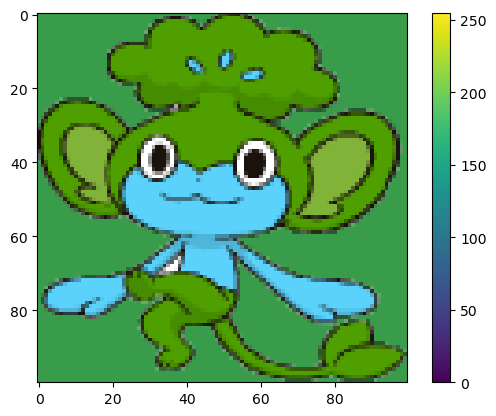

In [28]:
def prepare_Qdata(imgdir):
    x = []
    for filename in tqdm(os.listdir(f'{imgdir}')):
        if filename.endswith('png'):   
            im = cv2.imread(f'{imgdir}/{filename}')
            if im is not None:
                im = cv2.resize(im, (100, 100))
                x.append(im)
    return x

x_query=prepare_Qdata("pokemon_dataset/pokemon/Query/")
plt.imshow(x_query[4])
plt.colorbar()
plt.show()

# Make pairs for training

In [30]:
def make_pairs(x, y):
    num_classes = max(y) + 1
    digit_indices = [np.where(y == i)[0] for i in range(num_classes)]

    pairs = []
    labels = []

    for idx1 in range(len(x)):
        # add a matching example
        x1 = x[idx1]
        label1 = y[idx1]
        idx2 = random.choice(digit_indices[label1])
        x2 = x[idx2]

        pairs += [[x1, x2]]
        labels += [0]

        # add a non-matching example
        label2 = random.randint(0, num_classes - 1)
        while label2 == label1:
            label2 = random.randint(0, num_classes - 1)

        idx2 = random.choice(digit_indices[label2])
        x2 = x[idx2]

        pairs += [[x1, x2]]
        labels += [1]

    return np.array(pairs), np.array(labels).astype("float32")


pairs_train, labels_train = make_pairs(x_train, y_train)
pairs_train.shape

(10150, 2, 100, 100, 3)

In [53]:
def visualize(pairs, labels, to_show=6, num_col=3, predictions=None, test=False):

    num_row = to_show // num_col if to_show // num_col != 0 else 1

    to_show = num_row * num_col

    # Plot the images
    fig, axes = plt.subplots(num_row, num_col, figsize=(5, 5))
    for i in range(to_show):

        # If the number of rows is 1, the axes array is one-dimensional
        if num_row == 1:
            ax = axes[i % num_col]
        else:
            ax = axes[i // num_col, i % num_col]

        ax.imshow(tf.concat([pairs[i][0], pairs[i][1]], axis=1), cmap="gray")
        ax.set_axis_off()
        if test:
            ax.set_title("True: {} | Pred: {:.5f}".format(labels[i], predictions[i][0]))
        else:
            ax.set_title("Label: {}".format(labels[i]))
    if test:
        plt.tight_layout(rect=(0, 0, 1.9, 1.9))
    else:
        plt.tight_layout(rect=(0, 0, 1.5, 1.5))
    plt.show()

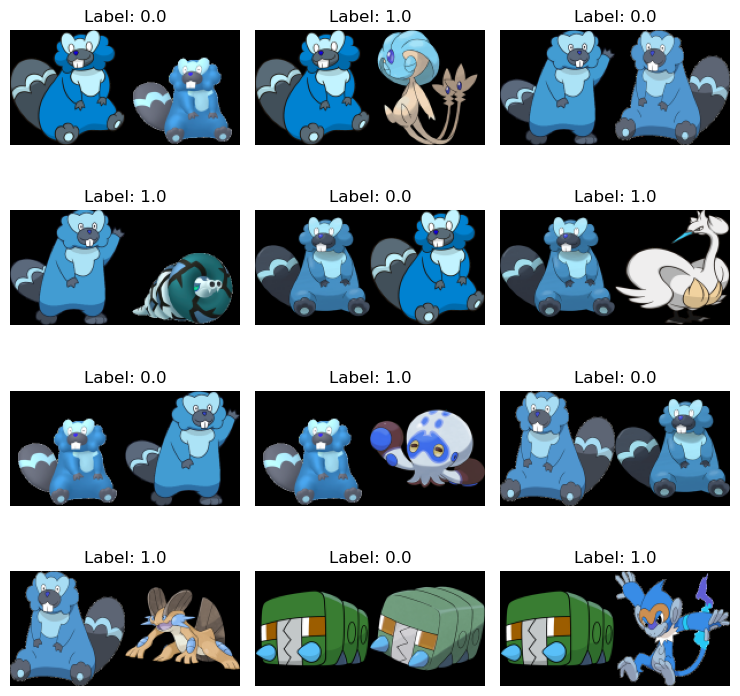

In [54]:
visualize(pairs_train[56:], labels_train[56:], to_show=12, num_col=3)

In [55]:
x_train_1 = pairs_train[:, 0] 
x_train_2 = pairs_train[:, 1]

In [56]:
def loss(margin=1):
    def contrastive_loss(y_true, y_pred):
        """Calculates the constrastive loss.

        Arguments:
            y_true: List of labels, each label is of type float32.
            y_pred: List of predictions of same length as of y_true,
                    each label is of type float32.

        Returns:
            A tensor containing constrastive loss as floating point value.
        """

        square_pred = tf.math.square(y_pred)
        margin_square = tf.math.square(tf.math.maximum(margin - (y_pred), 0))
        return tf.math.reduce_mean(
            (1 - y_true) * square_pred + (y_true) * margin_square
        )

    return contrastive_loss
def euclidean_distance(vects):
    """Find the Euclidean distance between two vectors.

    Arguments:
        vects: List containing two tensors of same length.

    Returns:
        Tensor containing euclidean distance
        (as floating point value) between vectors.
    """

    x, y = vects
    sum_square = tf.math.reduce_sum(tf.math.square(x - y), axis=1, keepdims=True)
    return tf.math.sqrt(tf.math.maximum(sum_square, tf.keras.backend.epsilon()))
def Embedding_ConvLayer():
    input = layers.Input((100, 100, 3))
    x = tf.keras.layers.BatchNormalization()(input)
    x = layers.Conv2D(14, (5, 5), activation="tanh")(x)
    x = layers.AveragePooling2D(pool_size=(2, 2))(x)
    x = layers.Conv2D(16, (5, 5), activation="tanh")(x)
    x = layers.AveragePooling2D(pool_size=(2, 2))(x)
    x = layers.Flatten()(x)

    x = tf.keras.layers.BatchNormalization()(x)
    x = layers.Dense(10, activation="tanh")(x)
    embedding_network = keras.Model(input, x)
    
    return embedding_network 


In [58]:
input_1 = layers.Input((100, 100, 3))
input_2 = layers.Input((100, 100, 3))

# sister nework
embedding_network=Embedding_ConvLayer()

# Encoded vector - 1
tower_1 = embedding_network(input_1)

# Encoded vector - 2
tower_2 = embedding_network(input_2)

# Euclidean Distance
merge_layer = layers.Lambda(euclidean_distance)([tower_1, tower_2])

normal_layer = tf.keras.layers.BatchNormalization()(merge_layer)

output_layer = layers.Dense(1, activation="sigmoid")(normal_layer)

siamese = keras.Model(inputs=[input_1, input_2], outputs=output_layer)
opt = keras.optimizers.Adam(learning_rate=0.0001)

siamese.compile(loss=loss(margin=1), optimizer=opt, metrics=["accuracy"])
siamese.summary()

Model: "model_3"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_4 (InputLayer)        [(None, 100, 100, 3)]        0         []                            
                                                                                                  
 input_5 (InputLayer)        [(None, 100, 100, 3)]        0         []                            
                                                                                                  
 model_2 (Functional)        (None, 10)                   115118    ['input_4[0][0]',             
                                                                     'input_5[0][0]']             
                                                                                                  
 lambda_1 (Lambda)           (None, 1)                    0         ['model_2[0][0]',       

In [65]:
dot_img_file = 'model_1.png'
tf.keras.utils.plot_model(siamese, to_file=dot_img_file, show_shapes=True)

You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) for plot_model to work.


In [62]:
!pip install graphviz

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 47.0/47.0 kB 423.9 kB/s eta 0:00:00 kB/s eta 0:00:01


In [76]:
history = siamese.fit(
    [x_train_1, x_train_2],
    labels_train,
    batch_size=20,
    epochs=30
)

Epoch 1/30
508/508 [==============================] - 66s 127ms/step - loss: 0.2433 - accuracy: 0.6864
Epoch 2/30
508/508 [==============================] - 65s 127ms/step - loss: 0.2382 - accuracy: 0.6964
Epoch 3/30
508/508 [==============================] - 65s 127ms/step - loss: 0.2351 - accuracy: 0.7009
Epoch 4/30
508/508 [==============================] - 65s 127ms/step - loss: 0.2281 - accuracy: 0.7200
Epoch 5/30
508/508 [==============================] - 65s 127ms/step - loss: 0.2256 - accuracy: 0.7299
Epoch 6/30
508/508 [==============================] - 65s 127ms/step - loss: 0.2203 - accuracy: 0.7407
Epoch 7/30
508/508 [==============================] - 65s 127ms/step - loss: 0.2166 - accuracy: 0.7473
Epoch 8/30
508/508 [==============================] - 65s 127ms/step - loss: 0.2152 - accuracy: 0.7496
Epoch 9/30
508/508 [==============================] - 65s 127ms/step - loss: 0.2090 - accuracy: 0.7607
Epoch 10/30
508/508 [==============================] - 65s 127ms/step - l

In [77]:
siamese.save("pokemon.h5")

# One shot 

In [78]:
def loss(margin=1):
    def contrastive_loss(y_true, y_pred):
        """Calculates the constrastive loss.

        Arguments:
            y_true: List of labels, each label is of type float32.
            y_pred: List of predictions of same length as of y_true,
                    each label is of type float32.

        Returns:
            A tensor containing constrastive loss as floating point value.
        """

        square_pred = tf.math.square(y_pred)
        margin_square = tf.math.square(tf.math.maximum(margin - (y_pred), 0))
        return tf.math.reduce_mean(
            (1 - y_true) * square_pred + (y_true) * margin_square
        )

    return contrastive_loss

def euclidean_distance(vects):
    """Find the Euclidean distance between two vectors.

    Arguments:
        vects: List containing two tensors of same length.

    Returns:
        Tensor containing euclidean distance
        (as floating point value) between vectors.
    """

    x, y = vects
    sum_square = tf.math.reduce_sum(tf.math.square(x - y), axis=1, keepdims=True)
    return tf.math.sqrt(tf.math.maximum(sum_square, tf.keras.backend.epsilon()))

def Embedding_ConvLayer():
    input = layers.Input((100, 100, 3))
    x = tf.keras.layers.BatchNormalization()(input)
    x = layers.Conv2D(14, (5, 5), activation="tanh")(x)
    x = layers.AveragePooling2D(pool_size=(2, 2))(x)
    x = layers.Conv2D(16, (5, 5), activation="tanh")(x)
    x = layers.AveragePooling2D(pool_size=(2, 2))(x)
    x = layers.Flatten()(x)

    x = tf.keras.layers.BatchNormalization()(x)
    x = layers.Dense(10, activation="tanh")(x)
    embedding_network = keras.Model(input, x)
    
    return embedding_network 




input_1 = layers.Input((100, 100, 3))
input_2 = layers.Input((100, 100, 3))

embedding_network=Embedding_ConvLayer()

tower_1 = embedding_network(input_1)
tower_2 = embedding_network(input_2)

merge_layer = layers.Lambda(euclidean_distance)([tower_1, tower_2])

normal_layer = tf.keras.layers.BatchNormalization()(merge_layer)

output_layer = layers.Dense(1, activation="sigmoid")(normal_layer)

siamese = keras.Model(inputs=[input_1, input_2], outputs=output_layer)

opt = keras.optimizers.Adam(learning_rate=0.0001)

siamese.compile(loss=loss(margin=1), optimizer=opt, metrics=["accuracy"])
siamese.load_weights("pokemon.h5")

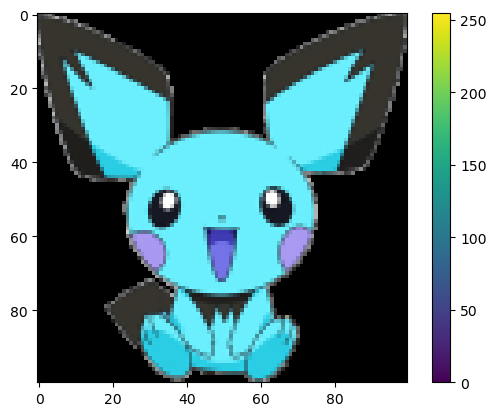

In [79]:
input_image = cv2.resize(x_query[1], (100, 100))
input_image = np.expand_dims(input_image, 0)
plt.imshow(input_image[0])
plt.colorbar()
plt.show()

In [80]:
def eval_(im1,imgdir, shot=1):
    for i,folder_name in enumerate(os.listdir(imgdir)):
        for i in range(shot):
            rn=random.choice(os.listdir(f'{imgdir}/{folder_name}'))
            if rn.endswith('png'):   
                im = cv2.imread(f'{imgdir}/{folder_name}/{rn}')
                if im is not None:
                    im = cv2.resize(im, (100, 100))
                    im = np.expand_dims(im, 0)
                    pred=siamese.predict([im1, im])
                    print("Similarity Score",pred)
                    plt.imshow(im[0])
                    plt.colorbar()
                    plt.show()
        print("-"*100)
    return 

# one shot

1/1 [==============================] - 0s 74ms/step
Similarity Score [[0.03440341]]


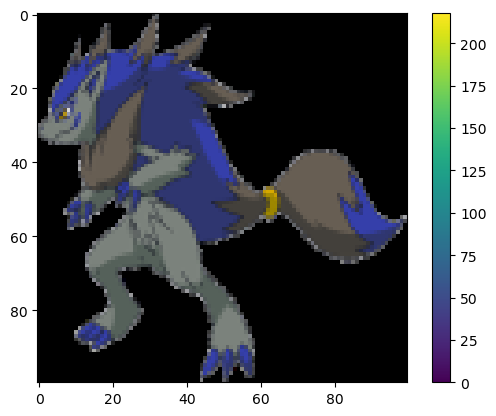

----------------------------------------------------------------------------------------------------
1/1 [==============================] - 0s 12ms/step
Similarity Score [[0.8291647]]


libpng warning: iCCP: known incorrect sRGB profile


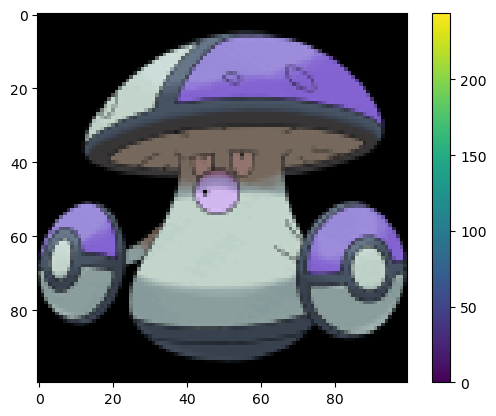

----------------------------------------------------------------------------------------------------
1/1 [==============================] - 0s 14ms/step
Similarity Score [[0.12137075]]


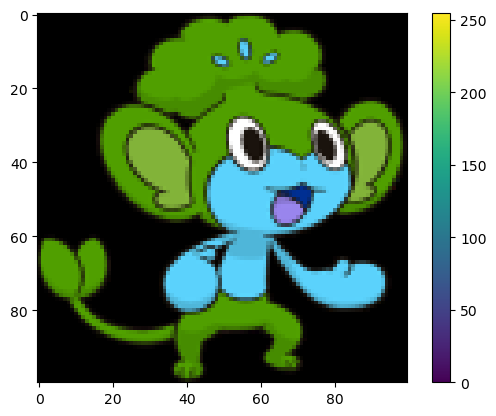

----------------------------------------------------------------------------------------------------
1/1 [==============================] - 0s 11ms/step
Similarity Score [[0.24075344]]


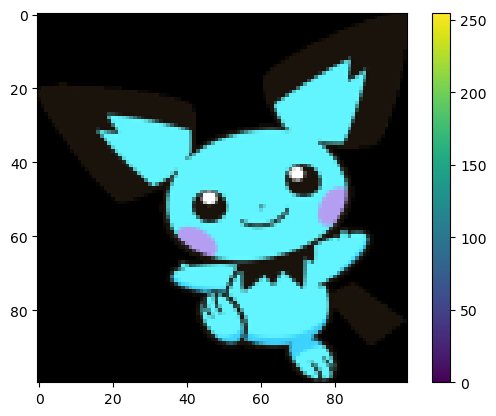

----------------------------------------------------------------------------------------------------
1/1 [==============================] - 0s 12ms/step
Similarity Score [[0.58155984]]


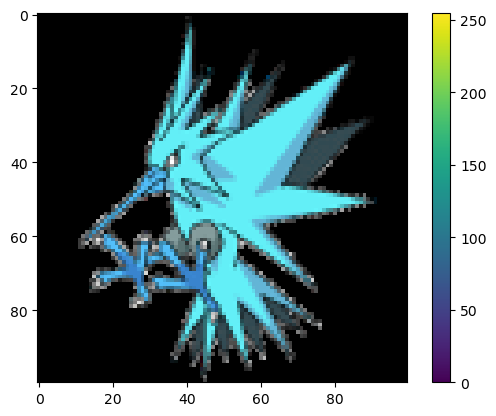

----------------------------------------------------------------------------------------------------


In [81]:
eval_(input_image,"pokemon_dataset/pokemon/support_set",1)

# Few shot

1/1 [==============================] - 0s 12ms/step
Similarity Score [[0.9975535]]


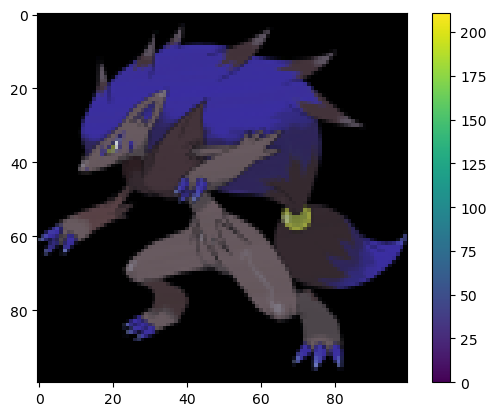

1/1 [==============================] - 0s 13ms/step
Similarity Score [[0.02213877]]


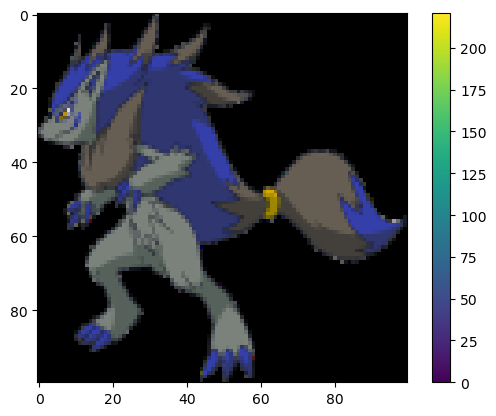

----------------------------------------------------------------------------------------------------
1/1 [==============================] - 0s 12ms/step
Similarity Score [[0.75574654]]


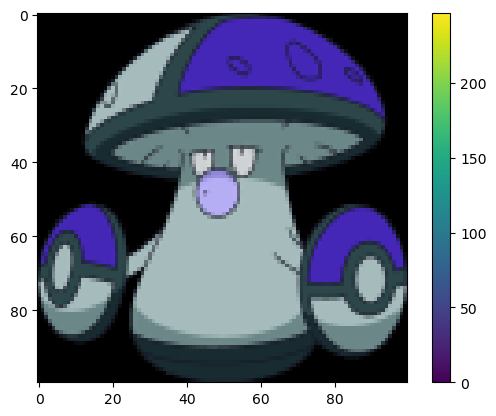

1/1 [==============================] - 0s 12ms/step


In [ ]:
eval_(input_image,"pokemon_dataset/pokemon/support_set/",2)

In [83]:
# https://github.com/stsfaroz/Siamese-Network-with-Contrastive-loss/tree/main
# https://keras.io/examples/vision/siamese_contrastive/